<div align="center"><h2>PHASE 5 CAPSTONE PROJECT</h2></div>
<div align="center"><h2>Predictive Modeling for Flight Passenger Preferences and Booking Patterns in Horizon Airlines</h2></div>

# Group Members

* Kamande Karigi
* Lewis Otsieka
* Marion Jelimo
* Titus Kilonzo Mutuku
* Yusra Noor

# BUSINESS UNDERSTANDING

## INTRODUCTION
Horizon Airlines, a prominent player in the aviation industry, stands as a cornerstone of reliable air travel services. As a leading airline company, Horizon Airlines is dedicated to providing safe, efficient, and seamless travel experiences for passengers across Kenya. With a fleet of modern aircraft and a commitment to operational excellence, Horizon Airlines has positioned itself as a trailblazer in the aviation sector. Recognizing the challenges and complexities inherent in managing a vast network of flights, passenger preferences, and operational logistics, Horizon Airlines has enlisted our expertise. Our team has been entrusted with the task of implementing advanced analytics to derive valuable insights from the company's extensive datasets. By harnessing the power of data-driven decision-making, our goal is to assist Horizon Airlines in optimizing its operations, enhancing customer experiences, and maintaining a competitive edge in the dynamic aviation landscape.


## PROBLEM STATEMENT
In the aftermath of the COVID-19 pandemic, the aviation industry is grappling with a multifaceted challenge to revitalize its operations and regain passenger trust. The problem revolves around understanding the intricate dynamics of customer behavior post-COVID, with a focus on influencing factors such as travel preferences, safety concerns, and the demand for additional services. It is crucial for airlines to tailor their services effectively with respect to the specific needs and concerns of passengers, utilising available data to inform effective safety measures, extra baggage, preferred seating, in-flight meals and other passenger preferences. This project provides an opportunity to investigate post-pandemic travel, and guide Horizon airlines to craft strategies that align with evolving customer expectations and foster a robust recovery.

## THE MAIN OBJECTIVES

To develop a model that learns over the available customer booking data, whose inferences improve or smooth out Horizon airlines' services. 

## THE SPECIFIC OBJECTIVES

1. To improve booking conversion rates.
2. To enhance customer segmentation by identifying distinct customer segments based on booking patterns and use the information to tailor marketing strategies, services or offers to specific groups.
3. To increase ancilliary service adoption and optimize marketing or pricing strategies for these services.
4. Optimize Operational Efficiency using patterns related to flight_day and flight_hour to optimize flight schedules, staffing, and other operational aspects.
5. Improve route specific strategies.

These objectives can be interconnected, and addressing one may positively impact others.


## RESEARCH QUESTIONS

1. Booking conversion analysis:
What are the primary factors inluencing booking completion and how do the vary across different sales channels?
Can the `purchase_lead` time be optimized to improve booking conversion rates without adversely affecting other aspects? 

The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome.
Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

2. Flight duration:
Which features are most significant in trying to predict flight duration?
How do aspects such as num of passengers and length of stay relate to flight duration?

3. Customer segmentation:
What are the distinct customer segments based on booking patterns, and how do these segments differ in terms of preferences and behaviors?
How can personalized marketing strategies be developed for each identified segment?

4. Ancillary Service Adoption:
What factors drive customers to opt for extra baggage, preferred seats, or in-flight meals, and are there cross-correlations between these preferences?
Can targeted promotions or bundling strategies be implemented to increase the adoption of these services?

5. Operational Efficiency Optimization:
How do `flight_day` and f`light_hour` affect booking patterns, and how can flight schedules be optimized to match demand?
Are there specific routes (`route`) that exhibit distinct patterns in terms of demand and booking behavior?

6. Route-specific Strategies:
How do customer preferences and behaviors vary across different flight routes, and what marketing or pricing strategies can be implemented for each route?
Are there external factors, such as events or seasons, that significantly impact booking patterns on specific routes?



## DEFINING METRICS OF SUCCESS
1. Booking Conversion Rates: 
Metric: Percentage of completed bookings (`booking_complete`).
Success Criteria: Increase in overall booking conversion rates, with a target improvement percentage.

2. Flight Duration Prediction:
Metric: Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) in predicting `flight_duration`.
Success Criteria: Decrease in prediction error, indicating more accurate flight duration predictions.

3. Customer Segmentation:
Metric: Silhouette Score or Homogeneity Score for clustering quality.
Success Criteria: Improved cluster separation and cohesion, indicating well-defined customer segments.

4. Ancillary Service Adoption:
Metric: Percentage of customers opting for extra baggage, preferred seats, or in-flight meals.
Success Criteria: Increase in adoption rates for targeted ancillary services.

5. Operational Efficiency Optimization:
Metric: Percentage of flights scheduled during peak demand days.
Success Criteria: Optimization of flight schedules with an increase in the proportion of flights scheduled during peak demand times.

6. Route-specific Strategies:
Metric: Percentage increase in bookings for specific routes.
Success Criteria: Successful implementation of targeted marketing or pricing strategies leading to increased bookings on selected routes. 

8. Customer Experience Enhancement:
Metric: Customer Satisfaction Score (CSAT) based on post-travel surveys.
Success Criteria: Increase in overall CSAT scores, indicating enhanced customer experience.

Each metric aligns with the specific objectives and is measurable over time. Feedback will be used to adjust strategies or models as needed to continuously improve performance.

## DATA UNDERSTANDING

The dataset consists of 50,000 entries and comprises 15 columns. It includes both numerical and categorical features, providing insights into flight passenger preferences and booking patterns. Below is an overview of the dataset columns:

* num_passengers - Represents the number of passengers for each booking.

* sales_channel - Denotes the specific channel through which flight bookings were made.

* trip_type - Indicates the type of trip, distinguishing between one-way and round-trip bookings.

* purchase_lead - Represents the lead time (in days) between considering and making a flight purchase.

* length_of_stay - Captures the duration of the stay associated with each flight booking.

* flight_hour - Specifies the hour of the day at which the flight is scheduled.

* flight_day - Records the date of the flight booking.

* route - Describes the specific route of the flight.

* booking_origin - Indicates the origin of the booking, providing insight into the geographic source.

* wants_extra_baggage - Binary variable indicating whether passengers express a desire for additional baggage.

* wants_preferred_seat - Binary variable indicating whether passengers express a preference for specific seating.

* wants_in_flight_meals - Binary variable indicating whether passengers express a desire for in-flight meals.

* flight_duration - Captures the total duration of the flight for each booking.

* booking_complete - Binary variable indicating whether the flight booking process is completed.

## DATA PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The DataFrame has 50,000 rows and 14 columns. There are no missing values in our data. There are 8 integer columns for numerical values, 5 object columns for categorical variables and 1 floating point column. We start by investigating the validity of the data types with respect to column values.

In [4]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


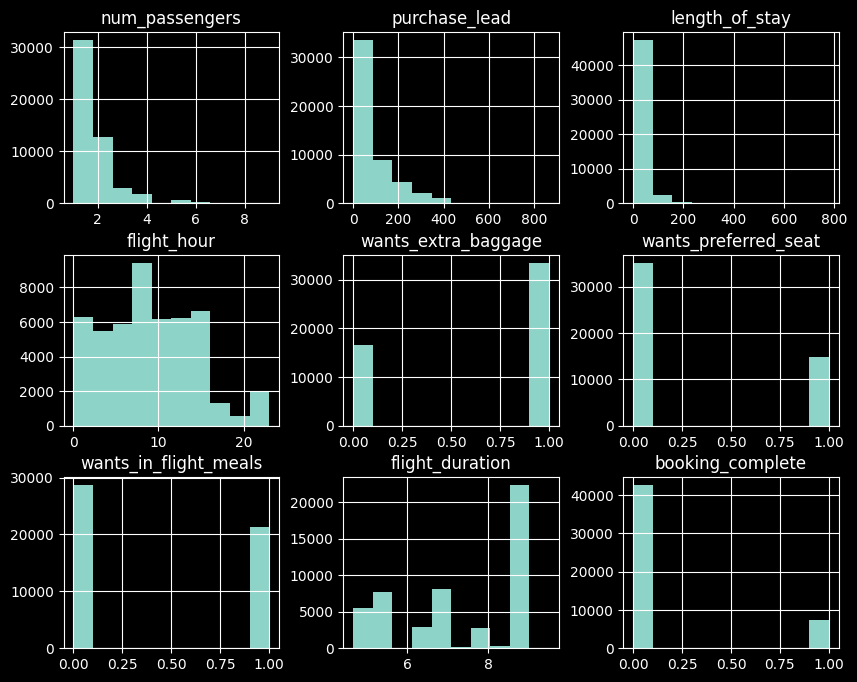

In [5]:
# Visualize the distribution of numerical variables
df.hist(figsize=(10, 8))
plt.show()


From the visualisation, the `num_passengers` column shows that the minimum number of passengers in a booking is 1, while the maximum is 9. It also shows that the majority of bookings involve a relatively small number of passengers, with occasional bookings involving larger passenger groups. The `purchase_lead` column shows that the minimum purchase lead time is 0 days, indicating bookings made on the same day as the travel date. The maximum purchase lead time is 867 days. This suggests a varied distribution of purchase lead times, with a wide range from last-minute bookings to bookings made several months in advance.
The columns `wants_extra_baggage`, `wants_preferred_seat`, `wants_in_flight_meals`, and `booking_complete` are distributed into 2 specific integer values; 0 and 1, indicating that they are of boolean datatype and not integer, therefore, they shall be converted to boolean to make them categorical columns.
The `flight_hour` column shows that most flights happen early in the morning from 7:30 to 10 am. Outside of these hours, from midnight to 3pm, we have an almost even distribution of flights. These taper off as the day winds down. 


In [ ]:
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols].astype('bool')

In [ ]:
# Selecting only binary preference variables for distribution analysis
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]

# Create subplots for each binary preference variable
plt.figure(figsize=(14, 6))
for i, column in enumerate(binary_preferences.columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
binary_preferences = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']]
percentages = binary_preferences.mean() *  100
percentages

Approximately 67% of passengers prefer extra baggage, this is also clear from the visualization. 30% of the passengers had seats they preferred. 42% of the passengers preferred meals in flight. Only about 15% of the bookings were completed.
After evaluating the numerical columns, we investigte categorical columns of object dtype.

In [ ]:
categorical_columns = ['booking_origin', 'trip_type', 'flight_day', 'route']
unique_counts = {col: df[col].nunique() for col in categorical_columns}
unique_counts

In [ ]:
df.info()

In [ ]:
# # Assuming df is your DataFrame containing the data
# plt.figure(figsize=(10, 6))

# # Count plot for flight_day
# sns.countplot(data=df, x='flight_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# # Adding labels and title
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Flights')
# plt.title('Number of Flights by Day of the Week')

# # Rotating x-axis labels for better readability
# plt.xticks(rotation=45)

# # Show plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
df['flight_day'].unique()

From the chart, the highest number of bookings were round trips, followed by one way trips. Circle trips which are like round-trips, except that the route on the return trip differs from the route on the outgoing trip, were least booked.



In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

In [ ]:
# Data Distribution - Histograms
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Data Distribution - Histograms")
plt.show()

In [ ]:
# Data Distribution - Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Explore Relationships - Example: Sales Channel vs. Booking Complete
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title("Relationship between Sales Channel and Booking Complete")
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

In [ ]:
# Segmentation - Example: Trip Type vs. Flight Duration
sns.barplot(x='trip_type', y='flight_duration', data=df)
plt.title("Trip Type vs. Flight Duration")
plt.show()

In [ ]:
# Outlier Detection - Example: Boxplot for Purchase Lead
sns.boxplot(x='purchase_lead', data=df)
plt.title("Boxplot for Purchase Lead")
plt.show()

## Feature Engineering

`flight_duration` is in hours, we convert `purchase_lead` and `length_of_stay` into hours too.

In [6]:
# Define conversion factors
hours_in_day = 24

# Convert time-related columns to hours
df['purchase_lead_hours'] = df['purchase_lead'] * hours_in_day
df['length_of_stay_hours'] = df['length_of_stay'] * hours_in_day

# Drop the original columns
# df.drop(columns=['purchase_lead', 'length_of_stay'], inplace=True)

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  purchase_lead_hours    50000 non-null  int64  
 15  le

In [8]:
# to be removed because this operation has already been carried out earlier in eda
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols] = df[bool_cols].astype('bool')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  bool   
 10  wants_preferred_seat   50000 non-null  bool   
 11  wants_in_flight_meals  50000 non-null  bool   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  bool   
 14  purchase_lead_hours    50000 non-null  int64  
 15  le

In [10]:
def categorize_time_of_day(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Convert integer values to string representations of time
df['flight_hour_str'] = df['flight_hour'].astype(str)

# Apply categorize_time_of_day function
df['time_of_day_preference'] = df['flight_hour_str'].apply(categorize_time_of_day)

# Drop after use
df.drop(columns=['flight_hour_str'], inplace=True)

In [11]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours',
       'time_of_day_preference'],
      dtype='object')

In [12]:
# Define the mapping of days to integers
day_mapping = {'Mon': 1.0, 'Tue': 2.0, 'Wed': 3.0, 'Thu': 4.0, 'Fri': 5.0, 'Sat': 6.0, 'Sun': 7.0}

# Map the 'flight_day' column using the day_mapping dictionary
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Verify that the encoding matches the defined mapping
print(df[['flight_day', 'flight_day_encoded']].sample(6))
# Create 'is_weekend_flight' feature based on 'flight_day'

df['is_weekend_flight'] = df['flight_day_encoded'].apply(lambda x:  1 if x >=  6 else  0)

      flight_day  flight_day_encoded
46987        Tue                 2.0
6188         Sat                 6.0
9700         Thu                 4.0
35038        Wed                 3.0
36522        Mon                 1.0
4395         Thu                 4.0


In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,time_of_day_preference,flight_day_encoded,is_weekend_flight
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,True,False,False,5.52,False,6288,456,Morning,6.0,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,False,False,False,5.52,False,2688,480,Evening,6.0,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,True,True,False,5.52,False,5832,528,Afternoon,3.0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,False,False,True,5.52,False,2304,744,Evening,6.0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,True,False,True,5.52,False,1632,528,Afternoon,3.0,0


Create buckets for 'length_of_stay_hours' and 'purchase_lead_hours' to categorize stays into short, medium, long, etc. This can help simplify the model and potentially reveal patterns related to stay durations.

Also create buckets based on time period such as weeks and months.

In [14]:
def bin_column(data, num_bins, labels):
    # Use pd.qcut() to bin the column
    binned_column = pd.qcut(data, q=num_bins, labels=labels)
    return binned_column

# define quantiles
num_bins =  3
labels = ['Short', 'Medium', 'Long']
column_= ['length_of_stay_hours', 'purchase_lead_hours', 'flight_duration']

# Create new binned columns for each duration column
for col in column_:
    # Apply bin_column function to create binned column
    df[col + '_binned'] = bin_column(df[col], num_bins, labels)

# Display the DataFrame with new binned columns
print(df.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  ...  \
0            7        Sat  AKLDEL    New Zealand                 True  ...   
1            3        Sat  AKLDEL    New Zealand                False  ...   
2           17        Wed  AKLDEL          India                 True  ...   
3            4        Sat  AKLDEL    New Zealand                False  ...   
4           15        Wed  AKLDEL          India                 True  ...   

   flight_duration  booking_complete  purchase_lead_hours  \
0      

Create interaction features by combining related variables. For example, we can create features like "wants_extra_baggage_and_preferred_seat" or "wants_meals_and_preferred_seat" to capture combinations of customer preferences. simply multiply the boolean columns representing individual preferences. This will result in a new binary column where a value of 1 indicates that both preferences are true, and a value of 0 indicates that at least one preference is false.

In [15]:
# Create new features for combinations of customer preferences
df['wants_extra_baggage_and_preferred_seat'] = df['wants_extra_baggage'] & df['wants_preferred_seat']
df['wants_meals_and_preferred_seat'] = df['wants_in_flight_meals'] & df['wants_preferred_seat']
df['wants_extra_baggage_and_meals'] = df['wants_extra_baggage'] & df['wants_in_flight_meals']
df['wants_all_services'] = df['wants_extra_baggage'] & df['wants_preferred_seat'] & df['wants_in_flight_meals']
df['wants_seat_and_meals_but_no_baggage'] = (df['wants_preferred_seat'] & df['wants_in_flight_meals']) & ~df['wants_extra_baggage']
df['wants_baggage_and_meals_but_no_seat'] = (df['wants_extra_baggage'] & df['wants_in_flight_meals']) & ~df['wants_preferred_seat']
df['wants_baggage_and_seat_but_no_meals'] = (df['wants_extra_baggage'] & df['wants_preferred_seat']) & ~df['wants_in_flight_meals']


Columns building using aggregate statistics

In [16]:
df[bool_cols] = df[bool_cols].astype('int')

df['total_preferences'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,purchase_lead_hours_binned,flight_duration_binned,wants_extra_baggage_and_preferred_seat,wants_meals_and_preferred_seat,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,Long,Short,False,False,False,False,False,False,False,1
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,Long,Short,False,False,False,False,False,False,False,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,Long,Short,True,False,False,False,False,False,True,2
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,Long,Short,False,False,False,False,False,False,False,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,Medium,Short,False,False,True,False,False,True,False,2


In [17]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by sales_channel
agg_sales = df.groupby('sales_channel').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_sales.columns = ['sales_channel', 'avg_purchase_lead_sales', 'std_purchase_lead_sales', 'avg_length_of_stay_sales', 'std_length_of_stay_sales']

df = pd.merge(df, agg_sales, on='sales_channel', how='left')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,wants_extra_baggage_and_meals,wants_all_services,wants_seat_and_meals_but_no_baggage,wants_baggage_and_meals_but_no_seat,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,False,False,False,False,False,1,2048.920373,2173.450504,570.532919,828.813233
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,False,False,False,False,False,0,2048.920373,2173.450504,570.532919,828.813233
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,False,False,False,False,True,2,2048.920373,2173.450504,570.532919,828.813233
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,False,False,False,False,False,1,2048.920373,2173.450504,570.532919,828.813233
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,True,False,False,True,False,2,2048.920373,2173.450504,570.532919,828.813233


In [18]:
# Calculate aggregate statistics of purchase_lead and length_of_stay (mean and standard deviation) grouped by trip_type
agg_trip = df.groupby('trip_type').agg({'purchase_lead_hours': ['mean', 'std'], 'length_of_stay_hours': ['mean', 'std']}).reset_index()

agg_trip.columns = ['trip_type', 'avg_purchase_lead_trip', 'std_purchase_lead_trip', 'avg_length_of_stay_trip', 'std_length_of_stay_trip']

df = pd.merge(df, agg_trip, on='trip_type', how='left')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,wants_baggage_and_seat_but_no_meals,total_preferences,avg_purchase_lead_sales,std_purchase_lead_sales,avg_length_of_stay_sales,std_length_of_stay_sales,avg_purchase_lead_trip,std_purchase_lead_trip,avg_length_of_stay_trip,std_length_of_stay_trip
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,...,False,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,...,False,0,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,...,True,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,...,False,1,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,...,False,2,2048.920373,2173.450504,570.532919,828.813233,2036.749379,2171.215514,553.88666,814.683874


In [19]:
# Compute the variance of 'flight_duration' and 'flight_day_encoded' grouped by 'route'
variance_by_route = df.groupby('route').agg({'flight_duration': 'var', 'flight_day_encoded': 'var'}).reset_index()
variance_by_route.columns = ['route', 'variance_flight_duration_by_route', 'variance_flight_day_by_route']

# Compute the variance of 'flight_duration' and 'flight_day_encoded' grouped by 'booking_origin'
variance_by_origin = df.groupby('booking_origin').agg({'flight_duration': 'var', 'flight_day_encoded': 'var'}).reset_index()
variance_by_origin.columns = ['booking_origin', 'variance_flight_duration_by_origin', 'variance_flight_day_by_origin']

# Merge the calculated variances back to the original DataFrame 'df'
df = pd.merge(df, variance_by_route, on='route', how='left')
df = pd.merge(df, variance_by_origin, on='booking_origin', how='left')

In [20]:
import airportsdata

# Load the airport data using the IATA code as the key
airports = airportsdata.load('IATA')

# Function to retrieve airport information for an airport code
def get_airport_info(airport_code):
    airport_info = airports.get(airport_code)
    if airport_info:
        return {
            'latitude': airport_info['lat'],
            'longitude': airport_info['lon'],
            'city': airport_info['city'],
            'timezone': airport_info['tz']
        }
    else:
        return None  # Return None if data is not found for the airport code

# Iterate over rows in the dataframe and retrieve airport information for each airport code
for index, row in df.iterrows():
    origin_code = row['route'][:3]
    dest_code = row['route'][3:]
    
    origin_info = get_airport_info(origin_code)
    dest_info = get_airport_info(dest_code)
    
    if origin_info:
        df.at[index, 'origin_latitude'] = origin_info['latitude']
        df.at[index, 'origin_longitude'] = origin_info['longitude']
        df.at[index, 'origin_city'] = origin_info['city']
        df.at[index, 'origin_timezone'] = origin_info['timezone']
    
    if dest_info:
        df.at[index, 'dest_latitude'] = dest_info['latitude']
        df.at[index, 'dest_longitude'] = dest_info['longitude']
        df.at[index, 'dest_city'] = dest_info['city']
        df.at[index, 'dest_timezone'] = dest_info['timezone']


Calculate distances, now that we have latitude and longitude. Euclidean distance is the straight-line distance between two points in a two-dimensional space, such as a Cartesian coordinate system. When applied to geographical data, it treats the Earth's surface as a flat plane, which can lead to inaccuracies, especially for long distances. Great Circle distance, also known as orthodromic distance, is the shortest distance between two points on the surface of a sphere, measured along the surface of the sphere (i.e., the Earth). It takes into account the curvature of the Earth, representing the shortest path between two points along the surface of the Earth. Great Circle distance is more accurate for calculating distances over long distances, especially when considering travel routes on the Earth's surface.

In [21]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate euclidean distance

def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# Function to calculate great circle distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate the change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Use Haversine formula to calculate distance
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Calculate Euclidean Distance
df['euclidean_distance'] = euclidean_distance(df['origin_latitude'], df['origin_longitude'], 
                                               df['dest_latitude'], df['dest_longitude'])

# Calculate Great Circle Distance (Haversine Distance)
df['great_circle_distance'] = df.apply(lambda row: haversine_distance(row['origin_latitude'], row['origin_longitude'],
                                                                     row['dest_latitude'], row['dest_longitude']),
                                       axis=1)


In [22]:
print(df[['origin_city', 'booking_origin', 'dest_city', 'route', 'trip_type']].sample(10))

               origin_city booking_origin               dest_city   route  \
43461              Jakarta          China                Shanghai  CGKPVG   
12021               Phuket      Australia              Gold Coast  HKTOOL   
24159           Phnom Penh      Australia                  Sydney  PNHSYD   
735               Auckland    New Zealand            Kuala Lumpur  AKLKUL   
2819             Bangalore      Australia                   Perth  BLRPER   
40691            Melbourne      Australia                 Beijing  MELPEK   
36319  Chitose / Tomakomai      Indonesia  Yogyakarta-Java Island  CTSJOG   
3926               Jakarta      Indonesia                  Tehran  CGKIKA   
2271   Bandung-Java Island          China                Hangzhou  BDOHGH   
20756            Melbourne      Australia                  Taipei  MELTPE   

       trip_type  
43461  RoundTrip  
12021  RoundTrip  
24159  RoundTrip  
735    RoundTrip  
2819   RoundTrip  
40691  RoundTrip  
36319  RoundTrip  


Analyze data on the frequency of flights between origin and destination airports. This can indicate the popularity and demand for specific routes, which may affect booking completion rates.

In [23]:
# your analysis here


# Segmentation Analysis:

Conduct segmentation analysis to identify subgroups of customers based on the interaction feature and binary columns. This can be done based on the booking complete column. The goal is to find out why so many customers are not completing their order, and if there is any unique traits about those that complete their orders.

# can we do this earlier on in the notebook, or say it has been done in eda, so maybe just do clustering later on while building the model


In [24]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours', 'time_of_day_preference',
       'flight_day_encoded', 'is_weekend_flight',
       'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg

Booking completion based segmentaion.

In [25]:
complete_bookings_subset = df[df['booking_complete'] == True]

complete_bookings_subset.sample(8)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
17795,1,Internet,RoundTrip,15,68,13,Fri,KTMPEN,Malaysia,1,...,27.696600,85.359100,Kathmandu,Asia/Kathmandu,5.297140,100.277000,Penang,Asia/Kuala_Lumpur,26.912442,2948.090072
21245,1,Internet,RoundTrip,15,38,1,Fri,MRUPEK,China,1,...,-20.430201,57.683601,Port Louis,Indian/Mauritius,40.080101,116.584999,Beijing,Asia/Shanghai,84.444486,9076.624714
28226,1,Internet,RoundTrip,11,3,2,Sun,ICNSUB,Indonesia,0,...,37.469101,126.450996,Seoul,Asia/Seoul,-7.379830,112.787003,Surabaya,Asia/Jakarta,46.884233,5185.152247
25178,2,Internet,RoundTrip,227,30,12,Fri,SINSYD,Singapore,0,...,1.350190,103.994003,Singapore,Asia/Singapore,-33.946098,151.177002,Sydney,Australia/Sydney,58.924217,6293.442587
36779,2,Internet,RoundTrip,58,5,9,Sun,DMKICN,Thailand,1,...,13.912600,100.607002,Bangkok,Asia/Bangkok,37.469101,126.450996,Seoul,Asia/Seoul,34.968855,3658.375457
44142,5,Internet,RoundTrip,161,6,8,Sun,CTUDPS,Singapore,0,...,30.578501,103.946999,Chengdu,Asia/Shanghai,-8.748170,115.167000,Denpasar-Bali Island,Asia/Makassar,40.895910,4533.954911
32613,2,Internet,RoundTrip,5,4,3,Thu,ICNLGK,South Korea,1,...,37.469101,126.450996,Seoul,Asia/Seoul,6.329730,99.728699,Langkawi,Asia/Kuala_Lumpur,41.033421,4391.837794
377,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,...,-37.008099,174.792007,Auckland,Pacific/Auckland,2.745580,101.709999,Kuala Lumpur,Asia/Kuala_Lumpur,83.194561,8703.353493


In [26]:
trip_type_counts = complete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

trip_type
RoundTrip     7453
OneWay          20
CircleTrip       5
Name: count, dtype: int64


In [27]:
incomplete_bookings_subset = df[df['booking_complete'] != True]
incomplete_bookings_subset.sample(6)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,origin_latitude,origin_longitude,origin_city,origin_timezone,dest_latitude,dest_longitude,dest_city,dest_timezone,euclidean_distance,great_circle_distance
12092,1,Internet,RoundTrip,50,89,12,Tue,HKTOOL,Australia,1,...,8.113200,98.316902,Phuket,Asia/Bangkok,-28.164400,153.505005,Gold Coast,Australia/Brisbane,66.043856,7164.110341
7924,2,Internet,RoundTrip,23,240,11,Tue,DACSYD,Australia,1,...,23.843347,90.397783,Dhaka,Asia/Dhaka,-33.946098,151.177002,Sydney,Australia/Sydney,83.867356,9082.547268
30518,1,Internet,RoundTrip,69,4,10,Thu,DELSIN,India,0,...,28.566500,77.103104,New Delhi,Asia/Kolkata,1.350190,103.994003,Singapore,Asia/Singapore,38.260267,4159.415277
47263,1,Mobile,RoundTrip,123,6,3,Tue,ICNMRU,South Korea,1,...,37.469101,126.450996,Seoul,Asia/Seoul,-20.430201,57.683601,Port Louis,Indian/Mauritius,89.895961,9644.154984
34606,1,Internet,RoundTrip,36,4,13,Sun,PERTPE,Taiwan,0,...,-31.940300,115.967003,Perth,Australia/Perth,25.077700,121.233002,Taipei,Asia/Taipei,57.260659,6364.719862
36475,2,Internet,RoundTrip,72,5,15,Tue,CTUTWU,China,0,...,30.578501,103.946999,Chengdu,Asia/Shanghai,4.320160,118.127998,Tawau,Asia/Kuala_Lumpur,29.842943,3276.474632


In [28]:
trip_type_counts = incomplete_bookings_subset['trip_type'].value_counts()

# Now trip_type_counts contains the counts of unique elements in the "trip_type" column
print(trip_type_counts)

trip_type
RoundTrip     42044
OneWay          367
CircleTrip      111
Name: count, dtype: int64


In [29]:
df['origin_timezone'].sample(5)

25662         Asia/Kuching
6741          Asia/Kolkata
12237         Asia/Bangkok
34310    Asia/Kuala_Lumpur
11825         Asia/Bangkok
Name: origin_timezone, dtype: object

## Transformation

Since hours of the day have a cyclical nature, you can encode flight_hour using trigonometric functions like sine and cosine. This transformation can capture the periodicity of time features and prevent issues such as treating 23:00 and 00:00 as far apart. The technique transforms the hour of the day into two continuous variables, which represent the cyclic pattern of time.

In [30]:
# Perform periodic encoding for flight_hour
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour'] / hours_in_day)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour'] / hours_in_day)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   num_passengers                          50000 non-null  int64   
 1   sales_channel                           50000 non-null  object  
 2   trip_type                               50000 non-null  object  
 3   purchase_lead                           50000 non-null  int64   
 4   length_of_stay                          50000 non-null  int64   
 5   flight_hour                             50000 non-null  int64   
 6   flight_day                              50000 non-null  object  
 7   route                                   50000 non-null  object  
 8   booking_origin                          50000 non-null  object  
 9   wants_extra_baggage                     50000 non-null  int64   
 10  wants_preferred_seat                    50000 

In [32]:
# convert boolean columns
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols] = df[bool_cols].astype('bool')

Normalize the time-related columns to ensure they're on the same scale.

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['purchase_lead_hours', 'length_of_stay_hours', 'flight_duration']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print first few rows to verify the changes
print(df.head())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  ...  \
0            7        Sat  AKLDEL    New Zealand                 True  ...   
1            3        Sat  AKLDEL    New Zealand                False  ...   
2           17        Wed  AKLDEL          India                 True  ...   
3            4        Sat  AKLDEL    New Zealand                False  ...   
4           15        Wed  AKLDEL          India                 True  ...   

   origin_city   origin_timezone  dest_latitude  dest_longitude  des

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   num_passengers                          50000 non-null  int64   
 1   sales_channel                           50000 non-null  object  
 2   trip_type                               50000 non-null  object  
 3   purchase_lead                           50000 non-null  int64   
 4   length_of_stay                          50000 non-null  int64   
 5   flight_hour                             50000 non-null  int64   
 6   flight_day                              50000 non-null  object  
 7   route                                   50000 non-null  object  
 8   booking_origin                          50000 non-null  object  
 9   wants_extra_baggage                     50000 non-null  bool    
 10  wants_preferred_seat                    50000 

One hot encoding `sales_channel` and `trip_type` because they have a small number of unique values. 

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the categorical columns and transform the data
one_hot_encoded = encoder.fit_transform(df[['sales_channel', 'trip_type', 'time_of_day_preference']])

# Convert the one-hot encoded result to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['sales_channel', 'trip_type']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns if needed
# df = df.drop(['sales_channel', 'trip_type', 'time_of_day_preference'], axis=1)


In [36]:
df.dtypes

num_passengers                               int64
sales_channel                               object
trip_type                                   object
purchase_lead                                int64
length_of_stay                               int64
flight_hour                                  int64
flight_day                                  object
route                                       object
booking_origin                              object
wants_extra_baggage                           bool
wants_preferred_seat                          bool
wants_in_flight_meals                         bool
flight_duration                            float64
booking_complete                              bool
purchase_lead_hours                        float64
length_of_stay_hours                       float64
time_of_day_preference                      object
flight_day_encoded                         float64
is_weekend_flight                            int64
length_of_stay_hours_binned    

Label encoding route, origin_city, origin_timezone, dest_city, dest_timezone because they have several different categorical variable in them that would balloon the number of columns and reduce model interpretability if they are one hot encoded.

In [38]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df, features):
    """
    Encode categorical features in the DataFrame using LabelEncoder.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - features: list of feature names to be encoded
    
    Returns:
    - df: pandas DataFrame with encoded categorical features
    """
    label_encoder = LabelEncoder()
    for feature in features:
        df[f'{feature}_encoded'] = label_encoder.fit_transform(df[feature])
    return df

# List of categorical features to be encoded
categorical_features = ['route', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone']

# Encode categorical features
df = label_encode_features(df, categorical_features)

# Drop the original categorical columns if needed
# df = df.drop(['route', 'origin_city', 'origin_timezone', 'dest_city', 'dest_timezone'], axis=1)

In [39]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'purchase_lead_hours', 'length_of_stay_hours', 'time_of_day_preference',
       'flight_day_encoded', 'is_weekend_flight',
       'length_of_stay_hours_binned', 'purchase_lead_hours_binned',
       'flight_duration_binned', 'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'total_preferences',
       'avg_purchase_lead_sales', 'std_purchase_lead_sales',
       'avg_length_of_stay_sales', 'std_length_of_stay_sales',
       'avg_purchase_lead_trip', 'std_purchase_lead_trip',
       'avg

## Undersample majority class

## Feature Importance Analysis

Drop columns that will not be useful in modeling

## Modeling